In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

import seaborn as sns
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display


from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

from sklearn.cluster import DBSCAN

In [3]:
plt.rcParams['figure.figsize'] = [6,4]
plt.rcParams['figure.dpi'] = 200
plt.rcParams["axes.grid"] = False

In [4]:
%store -r India_2020

In [5]:
India_2020

,Unnamed: 0_x,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
9,9,MA Agarwal (INDIA),5,5,0,86,32,17.20,83,103.61,...,10,0,-,-,10.00,-,0,0,2,0
39,39,JJ Bumrah (INDIA),9,4,3,0,0*,0.00,6,0.00,...,482,5,2/43,96.40,5.62,102.8,0,0,0,0
43,43,YS Chahal (INDIA),4,2,1,14,10,14.00,18,77.77,...,265,7,3/47,37.85,6.79,33.4,0,0,1,0
63,63,S Dhawan (INDIA),6,5,0,290,96,58.00,317,91.48,...,-,-,-,-,-,-,-,-,3,0
95,95,SS Iyer (INDIA),9,9,1,331,103,41.37,347,95.38,...,-,-,-,-,-,-,-,-,3,0
96,96,RA Jadeja (INDIA),9,7,3,223,66*,55.75,226,98.67,...,472,7,2/44,67.42,5.36,75.4,0,0,2,0
97,97,KM Jadhav (INDIA),2,2,1,35,26*,35.00,42,83.33,...,-,-,-,-,-,-,-,-,2,0
114,114,V Kohli (INDIA),9,9,0,431,89,47.88,467,92.29,...,-,-,-,-,-,-,-,-,5,0
116,116,Kuldeep Yadav (INDIA),5,1,0,17,17,17.00,15,113.33,...,323,6,2/65,53.83,6.46,50.0,0,0,1,0
148,148,Mohammed Shami (INDIA),6,4,1,25,13,8.33,30,83.33,...,393,12,4/63,32.75,7.03,27.9,1,0,3,0


In [6]:
India_2020=India_2020.reset_index()

In [7]:
India_2020

,index,Unnamed: 0_x,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,9,9,MA Agarwal (INDIA),5,5,0,86,32,17.20,83,...,10,0,-,-,10.00,-,0,0,2,0
1,39,39,JJ Bumrah (INDIA),9,4,3,0,0*,0.00,6,...,482,5,2/43,96.40,5.62,102.8,0,0,0,0
2,43,43,YS Chahal (INDIA),4,2,1,14,10,14.00,18,...,265,7,3/47,37.85,6.79,33.4,0,0,1,0
3,63,63,S Dhawan (INDIA),6,5,0,290,96,58.00,317,...,-,-,-,-,-,-,-,-,3,0
4,95,95,SS Iyer (INDIA),9,9,1,331,103,41.37,347,...,-,-,-,-,-,-,-,-,3,0
5,96,96,RA Jadeja (INDIA),9,7,3,223,66*,55.75,226,...,472,7,2/44,67.42,5.36,75.4,0,0,2,0
6,97,97,KM Jadhav (INDIA),2,2,1,35,26*,35.00,42,...,-,-,-,-,-,-,-,-,2,0
7,114,114,V Kohli (INDIA),9,9,0,431,89,47.88,467,...,-,-,-,-,-,-,-,-,5,0
8,116,116,Kuldeep Yadav (INDIA),5,1,0,17,17,17.00,15,...,323,6,2/65,53.83,6.46,50.0,0,0,1,0
9,148,148,Mohammed Shami (INDIA),6,4,1,25,13,8.33,30,...,393,12,4/63,32.75,7.03,27.9,1,0,3,0


In [8]:
India_2020.drop(['index','Unnamed: 0_x'],inplace=True,axis=1)

In [9]:
India_2020

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,MA Agarwal (INDIA),5,5,0,86,32,17.20,83,103.61,0,...,10,0,-,-,10.00,-,0,0,2,0
1,JJ Bumrah (INDIA),9,4,3,0,0*,0.00,6,0.00,0,...,482,5,2/43,96.40,5.62,102.8,0,0,0,0
2,YS Chahal (INDIA),4,2,1,14,10,14.00,18,77.77,0,...,265,7,3/47,37.85,6.79,33.4,0,0,1,0
3,S Dhawan (INDIA),6,5,0,290,96,58.00,317,91.48,0,...,-,-,-,-,-,-,-,-,3,0
4,SS Iyer (INDIA),9,9,1,331,103,41.37,347,95.38,1,...,-,-,-,-,-,-,-,-,3,0
5,RA Jadeja (INDIA),9,7,3,223,66*,55.75,226,98.67,0,...,472,7,2/44,67.42,5.36,75.4,0,0,2,0
6,KM Jadhav (INDIA),2,2,1,35,26*,35.00,42,83.33,0,...,-,-,-,-,-,-,-,-,2,0
7,V Kohli (INDIA),9,9,0,431,89,47.88,467,92.29,0,...,-,-,-,-,-,-,-,-,5,0
8,Kuldeep Yadav (INDIA),5,1,0,17,17,17.00,15,113.33,0,...,323,6,2/65,53.83,6.46,50.0,0,0,1,0
9,Mohammed Shami (INDIA),6,4,1,25,13,8.33,30,83.33,0,...,393,12,4/63,32.75,7.03,27.9,1,0,3,0


In [10]:
India_2020_players =India_2020.copy()

In [11]:
India_2020_players.drop('Player',axis=1,inplace=True)

In [12]:
India_2020_players.HS=India_2020_players.HS.str.extract('(\d+)')
India_2020_players['HS'].fillna(value=0, inplace=True)


In [13]:
India_2020_players

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,5,5,0,86,32,17.20,83,103.61,0,0,...,10,0,-,-,10.00,-,0,0,2,0
1,9,4,3,0,0,0.00,6,0.00,0,0,...,482,5,2/43,96.40,5.62,102.8,0,0,0,0
2,4,2,1,14,10,14.00,18,77.77,0,0,...,265,7,3/47,37.85,6.79,33.4,0,0,1,0
3,6,5,0,290,96,58.00,317,91.48,0,3,...,-,-,-,-,-,-,-,-,3,0
4,9,9,1,331,103,41.37,347,95.38,1,2,...,-,-,-,-,-,-,-,-,3,0
5,9,7,3,223,66,55.75,226,98.67,0,2,...,472,7,2/44,67.42,5.36,75.4,0,0,2,0
6,2,2,1,35,26,35.00,42,83.33,0,0,...,-,-,-,-,-,-,-,-,2,0
7,9,9,0,431,89,47.88,467,92.29,0,5,...,-,-,-,-,-,-,-,-,5,0
8,5,1,0,17,17,17.00,15,113.33,0,0,...,323,6,2/65,53.83,6.46,50.0,0,0,1,0
9,6,4,1,25,13,8.33,30,83.33,0,0,...,393,12,4/63,32.75,7.03,27.9,1,0,3,0


In [14]:
India_2020_players.replace("-",0,inplace=True)

In [15]:
India_2020_players.drop('BBI',axis=1,inplace=True)

In [16]:
scaler = StandardScaler()

India_2020_players_scaled = pd.DataFrame(scaler.fit_transform(India_2020_players),columns=India_2020_players.columns)
India_2020_players_scaled.shape
India_2020_players_scaled.head()

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,0.017849,0.413114,-0.777029,-0.315666,-0.447778,-0.705486,-0.357104,0.550698,-0.420084,-0.596951,...,-0.462299,-0.698367,-0.731639,-0.762284,1.845617,-0.739882,-0.229416,0.0,0.106722,-0.229416
1,1.445737,0.037556,2.136829,-0.930554,-1.288184,-1.331678,-0.896789,-2.793054,-0.420084,-0.596951,...,3.647025,1.880892,0.702947,2.224271,0.612484,2.545640,-0.229416,0.0,-0.747052,-0.229416
2,-0.339124,-0.713560,0.194257,-0.830456,-1.025557,-0.821987,-0.812682,-0.283223,-0.420084,-0.596951,...,0.565032,0.695089,1.276781,0.410342,0.941883,0.327593,-0.229416,0.0,-0.320165,-0.229416
3,0.374821,0.413114,-0.777029,1.142905,1.233032,0.779901,1.282980,0.159232,-0.420084,1.509934,...,-0.462299,-0.753013,-0.731639,-0.762284,-0.969755,-0.739882,-0.229416,0.0,0.533609,-0.229416
4,1.445737,1.915345,0.194257,1.436049,1.416871,0.174460,1.493247,0.285095,2.380476,0.807639,...,-0.462299,-0.753013,-0.731639,-0.762284,-0.969755,-0.739882,-0.229416,0.0,0.533609,-0.229416


In [17]:
India_2020_players_scaled.describe()

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
count,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,...,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,20.0,2.000000e+01,2.000000e+01
mean,-7.511353e-17,-2.220446e-17,1.110223e-17,-3.885781e-17,1.165734e-16,1.498801e-16,9.436896e-17,2.331468e-16,-2.775558e-17,1.110223e-17,...,3.330669e-17,-4.440892e-17,5.551115e-17,-3.330669e-17,2.442491e-16,4.440892e-17,-3.608225e-17,0.0,1.110223e-17,-8.049117e-17
std,1.025978e+00,1.025978e+00,1.025978e+00,1.025978e+00,1.025978e+00,1.025978e+00,1.025978e+00,1.025978e+00,1.025978e+00,1.025978e+00,...,1.025978e+00,1.025978e+00,1.025978e+00,1.025978e+00,1.025978e+00,1.025978e+00,1.025978e+00,0.0,1.025978e+00,1.025978e+00
min,-1.410040e+00,-1.464676e+00,-7.770287e-01,-9.305542e-01,-1.288184e+00,-1.331678e+00,-9.388426e-01,-2.793054e+00,-4.200840e-01,-5.969507e-01,...,-4.622989e-01,-7.530127e-01,-7.316388e-01,-7.622842e-01,-9.697549e-01,-7.398816e-01,-2.294157e-01,0.0,-7.470519e-01,-2.294157e-01
25%,-6.960957e-01,-7.135600e-01,-7.770287e-01,-7.357205e-01,-8.220215e-01,-7.400721e-01,-7.233188e-01,-7.280673e-02,-4.200840e-01,-5.969507e-01,...,-4.622989e-01,-7.530127e-01,-7.316388e-01,-7.622842e-01,-9.697549e-01,-7.398816e-01,-2.294157e-01,0.0,-7.470519e-01,-2.294157e-01
50%,1.784861e-02,-3.380021e-01,-2.913858e-01,-4.443638e-01,-3.295965e-01,-2.212789e-01,-4.552283e-01,1.806936e-01,-4.200840e-01,-5.969507e-01,...,-4.622989e-01,-7.256900e-01,-7.316388e-01,-7.622842e-01,-2.152352e-01,-7.398816e-01,-2.294157e-01,0.0,-3.201651e-01,-2.294157e-01
75%,6.425499e-01,4.131137e-01,1.942572e-01,5.941533e-01,1.068891e+00,6.876103e-01,4.401591e-01,5.221365e-01,-4.200840e-01,8.076392e-01,...,-2.054662e-01,1.003835e+00,7.746764e-01,4.723033e-01,9.566635e-01,3.563576e-01,-2.294157e-01,0.0,2.134434e-01,-2.294157e-01
max,1.445737e+00,1.915345e+00,2.136829e+00,2.236834e+00,1.837074e+00,2.491008e+00,2.334315e+00,1.162907e+00,2.380476e+00,2.914524e+00,...,3.647025e+00,1.880892e+00,2.711367e+00,2.304821e+00,1.845617e+00,2.545640e+00,4.358899e+00,0.0,3.521816e+00,4.358899e+00


In [18]:
X =  India_2020_players_scaled.iloc[:,:].values

In [19]:
X

array([[ 0.01784861,  0.41311367, -0.77702869, -0.3156663 , -0.44777848,
        -0.70548591, -0.35710363,  0.55069768, -0.42008403, -0.59695074,
        -0.22941573, -0.01539555, -0.47172818, -2.02760005,  0.01784861,
        -0.4350879 , -0.68787271, -0.46229895, -0.69836733, -0.7316388 ,
        -0.76228415,  1.8456172 , -0.73988155, -0.22941573,  0.        ,
         0.1067217 , -0.22941573],
       [ 1.44573722,  0.03755579,  2.1368289 , -0.93055421, -1.28818385,
        -1.33167838, -0.89678919, -2.79305447, -0.42008403, -0.59695074,
         4.35889894, -0.93912861, -0.73379939, -1.54731579,  1.44573722,
         2.14321076,  2.137259  ,  3.64702503,  1.88089229,  0.70294708,
         2.22427112,  0.61248421,  2.54563999, -0.22941573,  0.        ,
        -0.74705191, -0.22941573],
       [-0.33912354, -0.71355998,  0.19425717, -0.83045618, -1.02555717,
        -0.82198684, -0.81268234, -0.28322333, -0.42008403, -0.59695074,
        -0.22941573, -0.86215086, -0.73379939, -1.4832

In [20]:
"""from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"""

'from sklearn.cross_validation import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)'

In [21]:
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)"""

'from sklearn.preprocessing import StandardScaler\nsc_X = StandardScaler()\nX_train = sc_X.fit_transform(X_train)\nX_test = sc_X.transform(X_test)\nsc_y = StandardScaler()\ny_train = sc_y.fit_transform(y_train)'

In [22]:
np.any(np.isnan(India_2020_players_scaled))

False

In [23]:
India_2020_players_scaled

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,0.017849,0.413114,-0.777029,-0.315666,-0.447778,-0.705486,-0.357104,0.550698,-0.420084,-0.596951,...,-0.462299,-0.698367,-0.731639,-0.762284,1.845617,-0.739882,-0.229416,0.0,0.106722,-0.229416
1,1.445737,0.037556,2.136829,-0.930554,-1.288184,-1.331678,-0.896789,-2.793054,-0.420084,-0.596951,...,3.647025,1.880892,0.702947,2.224271,0.612484,2.545640,-0.229416,0.0,-0.747052,-0.229416
2,-0.339124,-0.713560,0.194257,-0.830456,-1.025557,-0.821987,-0.812682,-0.283223,-0.420084,-0.596951,...,0.565032,0.695089,1.276781,0.410342,0.941883,0.327593,-0.229416,0.0,-0.320165,-0.229416
3,0.374821,0.413114,-0.777029,1.142905,1.233032,0.779901,1.282980,0.159232,-0.420084,1.509934,...,-0.462299,-0.753013,-0.731639,-0.762284,-0.969755,-0.739882,-0.229416,0.0,0.533609,-0.229416
4,1.445737,1.915345,0.194257,1.436049,1.416871,0.174460,1.493247,0.285095,2.380476,0.807639,...,-0.462299,-0.753013,-0.731639,-0.762284,-0.969755,-0.739882,-0.229416,0.0,0.533609,-0.229416
5,1.445737,1.164229,2.136829,0.663864,0.445152,0.697986,0.645170,0.391272,-0.420084,0.807639,...,0.565032,1.826247,1.276781,1.326446,0.539285,1.669927,-0.229416,0.0,0.106722,-0.229416
6,-1.053068,-0.713560,0.194257,-0.680309,-0.605354,-0.057450,-0.644469,-0.103788,-0.420084,-0.596951,...,-0.462299,-0.753013,-0.731639,-0.762284,-0.969755,-0.739882,-0.229416,0.0,0.106722,-0.229416
7,1.445737,1.915345,-0.777029,2.151035,1.049194,0.411467,2.334315,0.185373,-0.420084,2.914524,...,-0.462299,-0.753013,-0.731639,-0.762284,-0.969755,-0.739882,-0.229416,0.0,1.387382,-0.229416
8,0.017849,-1.089118,-0.777029,-0.809007,-0.841718,-0.712767,-0.833709,0.864386,-0.420084,-0.596951,...,-0.462299,1.012032,0.989864,0.905416,0.848975,0.858135,-0.229416,0.0,-0.320165,-0.229416
9,0.374821,0.037556,0.194257,-0.751808,-0.946769,-1.028412,-0.728576,-0.103788,-0.420084,-0.596951,...,-0.462299,1.394549,2.711367,0.252339,1.009452,0.151812,4.358899,0.0,0.533609,-0.229416


In [24]:
np.all(np.isfinite(India_2020_players_scaled))

True

K:\4th year\my research practical\jupyter\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


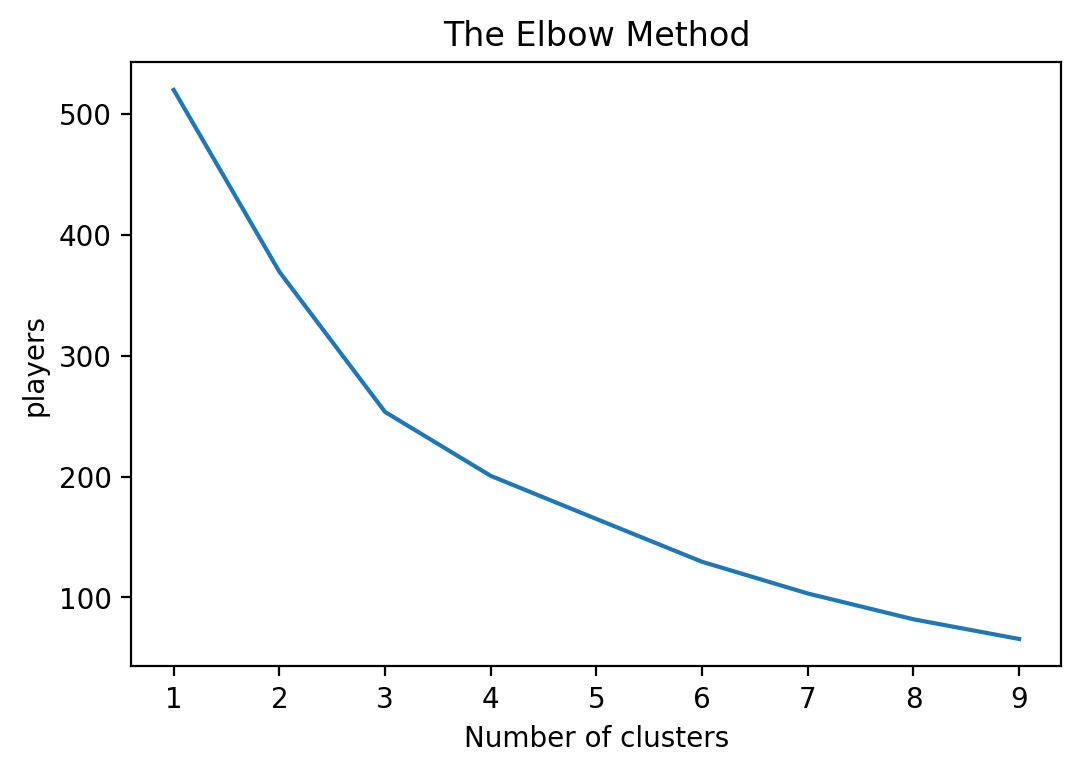

In [25]:
from sklearn.cluster import KMeans
players = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    players.append(kmeans.inertia_)
plt.plot(range(1, 10), players)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('players')
plt.show()

In [26]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)


In [27]:
y_kmeans

array([0, 1, 1, 2, 2, 1, 0, 2, 1, 1, 0, 0, 0, 0, 2, 1, 0, 0, 0, 1])

In [28]:
kmeans.cluster_centers_

array([[-8.94413559e-01, -5.88374017e-01, -4.53266736e-01,
        -3.75248459e-01, -8.59372847e-02, -8.09034198e-06,
        -3.89811842e-01, -7.54960995e-02, -1.08910673e-01,
        -4.40885186e-01, -2.29415734e-01, -3.57518907e-01,
        -2.09656967e-01,  3.02668025e-01, -8.94413559e-01,
        -6.49946121e-01, -6.65557292e-01, -3.48151059e-01,
        -6.89866944e-01, -6.35999738e-01, -5.59187380e-01,
        -2.50270942e-01, -5.48119596e-01, -2.29415734e-01,
         0.00000000e+00, -5.09892575e-01, -2.29415734e-01],
       [ 4.76812803e-01, -1.23397590e-01,  7.49277665e-01,
        -5.12798137e-01, -6.54128015e-01, -2.92843797e-01,
        -5.12300772e-01, -8.36410600e-02, -4.20084025e-01,
        -3.96295029e-01,  4.26057791e-01, -5.87230303e-01,
        -2.84534456e-01, -1.93371591e-01,  4.76812803e-01,
         1.26843086e+00,  1.26791414e+00,  7.11793617e-01,
         1.31726473e+00,  1.23579326e+00,  1.15454615e+00,
         8.75922600e-01,  1.12751465e+00,  4.26057791e-

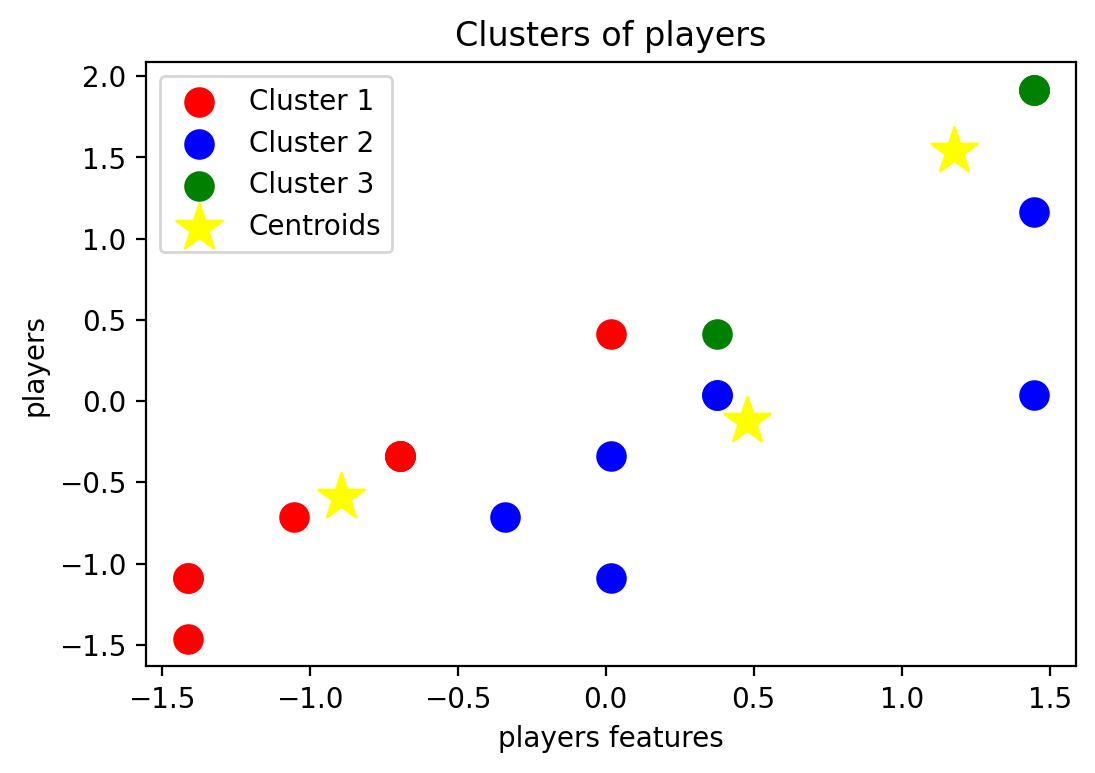

In [29]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300,marker='*', c = 'yellow', label = 'Centroids')
plt.title('Clusters of players')
plt.xlabel('players features')
plt.ylabel('players')
plt.legend()
plt.show()

In [30]:
India_2020

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,MA Agarwal (INDIA),5,5,0,86,32,17.20,83,103.61,0,...,10,0,-,-,10.00,-,0,0,2,0
1,JJ Bumrah (INDIA),9,4,3,0,0*,0.00,6,0.00,0,...,482,5,2/43,96.40,5.62,102.8,0,0,0,0
2,YS Chahal (INDIA),4,2,1,14,10,14.00,18,77.77,0,...,265,7,3/47,37.85,6.79,33.4,0,0,1,0
3,S Dhawan (INDIA),6,5,0,290,96,58.00,317,91.48,0,...,-,-,-,-,-,-,-,-,3,0
4,SS Iyer (INDIA),9,9,1,331,103,41.37,347,95.38,1,...,-,-,-,-,-,-,-,-,3,0
5,RA Jadeja (INDIA),9,7,3,223,66*,55.75,226,98.67,0,...,472,7,2/44,67.42,5.36,75.4,0,0,2,0
6,KM Jadhav (INDIA),2,2,1,35,26*,35.00,42,83.33,0,...,-,-,-,-,-,-,-,-,2,0
7,V Kohli (INDIA),9,9,0,431,89,47.88,467,92.29,0,...,-,-,-,-,-,-,-,-,5,0
8,Kuldeep Yadav (INDIA),5,1,0,17,17,17.00,15,113.33,0,...,323,6,2/65,53.83,6.46,50.0,0,0,1,0
9,Mohammed Shami (INDIA),6,4,1,25,13,8.33,30,83.33,0,...,393,12,4/63,32.75,7.03,27.9,1,0,3,0


In [31]:
India_2020["cluster"] = y_kmeans

In [32]:
India_2020

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St,cluster
0,MA Agarwal (INDIA),5,5,0,86,32,17.20,83,103.61,0,...,0,-,-,10.00,-,0,0,2,0,0
1,JJ Bumrah (INDIA),9,4,3,0,0*,0.00,6,0.00,0,...,5,2/43,96.40,5.62,102.8,0,0,0,0,1
2,YS Chahal (INDIA),4,2,1,14,10,14.00,18,77.77,0,...,7,3/47,37.85,6.79,33.4,0,0,1,0,1
3,S Dhawan (INDIA),6,5,0,290,96,58.00,317,91.48,0,...,-,-,-,-,-,-,-,3,0,2
4,SS Iyer (INDIA),9,9,1,331,103,41.37,347,95.38,1,...,-,-,-,-,-,-,-,3,0,2
5,RA Jadeja (INDIA),9,7,3,223,66*,55.75,226,98.67,0,...,7,2/44,67.42,5.36,75.4,0,0,2,0,1
6,KM Jadhav (INDIA),2,2,1,35,26*,35.00,42,83.33,0,...,-,-,-,-,-,-,-,2,0,0
7,V Kohli (INDIA),9,9,0,431,89,47.88,467,92.29,0,...,-,-,-,-,-,-,-,5,0,2
8,Kuldeep Yadav (INDIA),5,1,0,17,17,17.00,15,113.33,0,...,6,2/65,53.83,6.46,50.0,0,0,1,0,1
9,Mohammed Shami (INDIA),6,4,1,25,13,8.33,30,83.33,0,...,12,4/63,32.75,7.03,27.9,1,0,3,0,1


In [33]:
India_2020['cluster'].value_counts()

0    9
1    7
2    4
Name: cluster, dtype: int64

In [34]:
India_Cluster_2020 = np.array([9,7,4])

In [35]:
India_Cluster_2020

array([9, 7, 4])

In [36]:
%store India_Cluster_2020

Stored 'India_Cluster_2020' (ndarray)


In [37]:
India_2020_players_scaled.insert(0, 'Player', India_2020.Player)

In [38]:
India_2020_players_scaled

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,MA Agarwal (INDIA),0.017849,0.413114,-0.777029,-0.315666,-0.447778,-0.705486,-0.357104,0.550698,-0.420084,...,-0.462299,-0.698367,-0.731639,-0.762284,1.845617,-0.739882,-0.229416,0.0,0.106722,-0.229416
1,JJ Bumrah (INDIA),1.445737,0.037556,2.136829,-0.930554,-1.288184,-1.331678,-0.896789,-2.793054,-0.420084,...,3.647025,1.880892,0.702947,2.224271,0.612484,2.545640,-0.229416,0.0,-0.747052,-0.229416
2,YS Chahal (INDIA),-0.339124,-0.713560,0.194257,-0.830456,-1.025557,-0.821987,-0.812682,-0.283223,-0.420084,...,0.565032,0.695089,1.276781,0.410342,0.941883,0.327593,-0.229416,0.0,-0.320165,-0.229416
3,S Dhawan (INDIA),0.374821,0.413114,-0.777029,1.142905,1.233032,0.779901,1.282980,0.159232,-0.420084,...,-0.462299,-0.753013,-0.731639,-0.762284,-0.969755,-0.739882,-0.229416,0.0,0.533609,-0.229416
4,SS Iyer (INDIA),1.445737,1.915345,0.194257,1.436049,1.416871,0.174460,1.493247,0.285095,2.380476,...,-0.462299,-0.753013,-0.731639,-0.762284,-0.969755,-0.739882,-0.229416,0.0,0.533609,-0.229416
5,RA Jadeja (INDIA),1.445737,1.164229,2.136829,0.663864,0.445152,0.697986,0.645170,0.391272,-0.420084,...,0.565032,1.826247,1.276781,1.326446,0.539285,1.669927,-0.229416,0.0,0.106722,-0.229416
6,KM Jadhav (INDIA),-1.053068,-0.713560,0.194257,-0.680309,-0.605354,-0.057450,-0.644469,-0.103788,-0.420084,...,-0.462299,-0.753013,-0.731639,-0.762284,-0.969755,-0.739882,-0.229416,0.0,0.106722,-0.229416
7,V Kohli (INDIA),1.445737,1.915345,-0.777029,2.151035,1.049194,0.411467,2.334315,0.185373,-0.420084,...,-0.462299,-0.753013,-0.731639,-0.762284,-0.969755,-0.739882,-0.229416,0.0,1.387382,-0.229416
8,Kuldeep Yadav (INDIA),0.017849,-1.089118,-0.777029,-0.809007,-0.841718,-0.712767,-0.833709,0.864386,-0.420084,...,-0.462299,1.012032,0.989864,0.905416,0.848975,0.858135,-0.229416,0.0,-0.320165,-0.229416
9,Mohammed Shami (INDIA),0.374821,0.037556,0.194257,-0.751808,-0.946769,-1.028412,-0.728576,-0.103788,-0.420084,...,-0.462299,1.394549,2.711367,0.252339,1.009452,0.151812,4.358899,0.0,0.533609,-0.229416


In [39]:
India_2020_players_scaled[['Player','Ave_x','Ave_y']]

,Player,Ave_x,Ave_y
0,MA Agarwal (INDIA),-0.705486,-0.762284
1,JJ Bumrah (INDIA),-1.331678,2.224271
2,YS Chahal (INDIA),-0.821987,0.410342
3,S Dhawan (INDIA),0.779901,-0.762284
4,SS Iyer (INDIA),0.174460,-0.762284
5,RA Jadeja (INDIA),0.697986,1.326446
6,KM Jadhav (INDIA),-0.057450,-0.762284
7,V Kohli (INDIA),0.411467,-0.762284
8,Kuldeep Yadav (INDIA),-0.712767,0.905416
9,Mohammed Shami (INDIA),-1.028412,0.252339


In [40]:
India_2020_Ave=India_2020_players_scaled.mean()

In [41]:
India_2020_Ave

Mat_x          -7.511353e-17
Inns_x         -2.220446e-17
NO              1.110223e-17
Runs_x         -3.885781e-17
HS              1.165734e-16
Ave_x           1.498801e-16
BF              9.436896e-17
SR_x            2.331468e-16
100            -2.775558e-17
50              1.110223e-17
0              -1.249001e-16
4s              4.440892e-17
6s              1.110223e-17
Unnamed: 0_y   -3.330669e-17
Mat_y          -7.511353e-17
Inns_y          6.106227e-17
Overs          -5.551115e-17
Mdns            3.330669e-17
Runs_y         -4.440892e-17
Wkts            5.551115e-17
Ave_y          -3.330669e-17
Econ            2.442491e-16
SR_y            4.440892e-17
4              -3.608225e-17
5               0.000000e+00
Ct              1.110223e-17
St             -8.049117e-17
dtype: float64

In [42]:
India_Ave_2020 =India_2020_Ave[['Ave_x','Ave_y']]

In [43]:
India_Ave_2020

Ave_x    1.498801e-16
Ave_y   -3.330669e-17
dtype: float64

In [44]:
India_Ave_2020 = np.array([India_Ave_2020.Ave_x, India_Ave_2020.Ave_y])

In [45]:
India_Ave_2020

array([ 1.49880108e-16, -3.33066907e-17])

In [46]:
%store India_Ave_2020

Stored 'India_Ave_2020' (ndarray)


In [47]:
India_2020

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St,cluster
0,MA Agarwal (INDIA),5,5,0,86,32,17.20,83,103.61,0,...,0,-,-,10.00,-,0,0,2,0,0
1,JJ Bumrah (INDIA),9,4,3,0,0*,0.00,6,0.00,0,...,5,2/43,96.40,5.62,102.8,0,0,0,0,1
2,YS Chahal (INDIA),4,2,1,14,10,14.00,18,77.77,0,...,7,3/47,37.85,6.79,33.4,0,0,1,0,1
3,S Dhawan (INDIA),6,5,0,290,96,58.00,317,91.48,0,...,-,-,-,-,-,-,-,3,0,2
4,SS Iyer (INDIA),9,9,1,331,103,41.37,347,95.38,1,...,-,-,-,-,-,-,-,3,0,2
5,RA Jadeja (INDIA),9,7,3,223,66*,55.75,226,98.67,0,...,7,2/44,67.42,5.36,75.4,0,0,2,0,1
6,KM Jadhav (INDIA),2,2,1,35,26*,35.00,42,83.33,0,...,-,-,-,-,-,-,-,2,0,0
7,V Kohli (INDIA),9,9,0,431,89,47.88,467,92.29,0,...,-,-,-,-,-,-,-,5,0,2
8,Kuldeep Yadav (INDIA),5,1,0,17,17,17.00,15,113.33,0,...,6,2/65,53.83,6.46,50.0,0,0,1,0,1
9,Mohammed Shami (INDIA),6,4,1,25,13,8.33,30,83.33,0,...,12,4/63,32.75,7.03,27.9,1,0,3,0,1
